In [105]:
import torch

In [106]:
x=torch.empty(5,3)
x

tensor([[-4.8498e-27,  7.7632e-43,  0.0000e+00],
        [ 2.0000e+00,  0.0000e+00,  2.0000e+00],
        [ 0.0000e+00,  2.0000e+00,  0.0000e+00],
        [ 2.0000e+00,  0.0000e+00,  2.0000e+00],
        [ 0.0000e+00,  2.0000e+00,  0.0000e+00]])

In [107]:
x=torch.zeros(5,3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [108]:
y=torch.ones_like(x)
print(x+y+1)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [109]:
z=x.view(3,5)
z

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [110]:
z+=1
print(x)
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [111]:
a=x.clone().view(15)
a+=1
print(a)
print(x)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [112]:
x=torch.randn(1)
print(x)
print(x.item())

tensor([0.7392])
0.7391830682754517


In [113]:
print(torch.cuda.is_available())

True


In [114]:
x=torch.ones(2,2,requires_grad=True)
print(x)
print(x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


In [115]:
y=x*2
z=x+2
print(y.grad_fn)
print(z.grad_fn)

In [116]:
zz=z*z*3
out=zz.mean()
print(out)


tensor(27., grad_fn=<MeanBackward0>)


In [117]:
out.backward()

In [118]:
y.mean().backward()

In [119]:
print(x.grad)

tensor([[5., 5.],
        [5., 5.]])


In [120]:
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [129]:
import numpy as np
a=torch.from_numpy(np.array([[1,1],[2,2],[3,3]]))
a

tensor([[1, 1],
        [2, 2],
        [3, 3]], dtype=torch.int32)

In [136]:
aa=a.sum(axis=0)
print(aa)
bb=a.sum(axis=1)
print(bb)
sum=a.sum(axis=[0,1])
print(sum)
aa2=a.sum(axis=0,keepdim=True)
print(aa2)

tensor([6, 6])
tensor([2, 4, 6])
tensor(12)
tensor([[6, 6]])


In [140]:
b=torch.from_numpy(np.array([1,1]))
c=torch.from_numpy(np.array([2,3]))
print(b)
print(c)
print(torch.dot(b,c))


tensor([1, 1], dtype=torch.int32)
tensor([2, 3], dtype=torch.int32)
tensor(5, dtype=torch.int32)


In [143]:
x=torch.arange(24).reshape(2,3,4)
print(x)
print(x.sum(axis=0).shape)
print(x.sum(axis=1).shape)
print(x.sum(axis=2).shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])


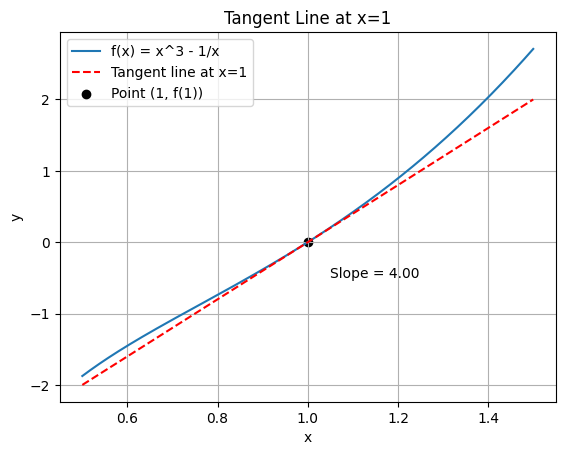

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数和导函数
def f(x):
    return x**3 - 1/x

def f_prime(x):
    return 3*x**2 + 1/x**2

# 计算 x = 1 处的函数值和导数值
x = 1
f_at_x = f(x)
slope_at_x = f_prime(x)

# 定义切线的斜率和截距
slope = slope_at_x
intercept = f_at_x - slope * x

# 定义切线上的 x 值
x_values = np.linspace(0.5, 1.5, 100)
# 计算切线上对应的 y 值
y_values = slope * x_values + intercept

# 绘制函数曲线
x_range = np.linspace(0.5, 1.5, 400)
plt.plot(x_range, f(x_range), label='f(x) = x^3 - 1/x')

# 绘制切线
plt.plot(x_values, y_values, 'r--', label='Tangent line at x=1')

# 标记切点和切线斜率
plt.scatter(x, f_at_x, color='black', label='Point (1, f(1))')
plt.text(1.05, f_at_x - 0.5, f"Slope = {slope_at_x:.2f}", fontsize=10)

# 添加标签和图例
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tangent Line at x=1')
plt.legend()

# 显示图形
plt.grid(True)
plt.show()
